In [24]:
# Manejo de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt

# Procesamiento de señales
import scipy.signal as signal
import scipy.io as sio

# Estadística
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import levene
from statsmodels.tsa.stattools import adfuller
from scipy.stats import mannwhitneyu

# Carga de archivos
from csv import reader as reader_csv
import os
from scipy.io import loadmat

En Esta celda Importamos todos los modulos necesarios para todo el analisis.

In [4]:
# Cargar el archivo .mat
data = loadmat('signals.mat')

In [5]:
print (data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 20 15:20:29 2015', '__version__': '1.0', '__globals__': [], 'Fs': array([[1024]], dtype=uint16), 'ECG_asRecording': array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
        4365.31103516, 4370.91796875]]), 'ECG_filtered': array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
        -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]]), 'EMG_filtered1': array([[ 17.65905117,  19.41391578,  18.89666666, ..., 242.49414224,
        220.4135886 , 151.5810508 ]]), 'EMG_filtered2': array([[  21.1780547 ,  -79.82418538, -133.65960989, ..., -384.58994036,
        -539.9349533 , -772.65519631]]), 'EMG_asRecording1': array([[ 908.07531738,  903.17706299,  896.62982178, ..., 1433.91882324,
        1416.109375  , 1352.75012207]]), 'EMG_asRecording2': array([[-3109.97558594, -3231.01391602, -3302.34960938, ...,
        -3791.24267578, -3924.6550293 , -4109.94433594]])}


In [6]:
# Obtener la señal sin filtrar y filtrada
ecg_signal= data['ECG_asRecording'].flatten()
ecg_signal_filtered = data['ECG_filtered'].flatten()

Cargamos el archivo a leer , vemos que datos hay, como están, que valores representan y seleccionamos las señales de interes (Filtrada y sin flitrar).

In [7]:
# Determinar la duración de las señales y crear un vector de tiempo
f = 1024
duration = len(ecg_signal) / f
time= np.linspace(0, duration, len(ecg_signal)) #Vector tiempo

Creamos el vector tiempo para los analisis posteriores, usando la frecuencia sugerdia (1024) y la duración de la señal.

Text(0, 0.5, 'Amplitud')

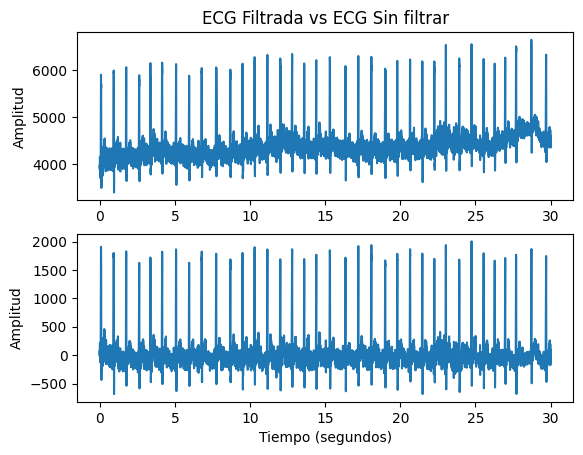

In [8]:
# Grafico la señal filtrada vs la señal sin filtrar
plt.subplot(2,1,1)
plt.plot(time, ecg_signal)
plt.title('ECG Filtrada vs ECG Sin filtrar')
plt.ylabel('Amplitud')

plt.subplot(2,1,2)
plt.plot(time, ecg_signal_filtered)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')

Luego de graficar las señales sin filtrar y filtrada nos damos cuenta que:
1. Se atenua la amplitud pasa de haber picos maximos de 6000 a picos maximos de 2000 sin perder información relevante o de interes.
2. En la señal sin filtrar se aprecie levemnete la presencia de una onda envolvente con un frecuencia mas baja que luego ya no aperece en la señal filtrada , se puede decir que se esta aplicando un filtro pasa bajas que elimina esa onda.

In [9]:
 # Defino la función que Calcula el Valor Cuadrático Medio (RMS) de una señal discreta.
def RMS(signal):
    # Elevar al cuadrado cada elemento de la señal
    squared_values = np.square(signal)

    # Calcular el promedio de los valores al cuadrado
    mean_squared = np.mean(squared_values)

    # Calcular la raíz cuadrada del promedio de los valores al cuadrado
    rms = np.sqrt(mean_squared)

    return rms

Comparación en la señal


In [10]:
# Seleccionar un ciclo cardiaco y graficar
# identificando visualmente dónde comienza un ciclo
start_index = 100
end_index = start_index + int(f)  # Un segundo de datos aproximadamente
cycle = ecg_signal[start_index:end_index]
time_cycle = time[start_index:end_index]

Seleccionamos aproximadamente un ciclo (Proceso hecho a ojo) donde decimos que un ciclo dura al rededor de un segundo 

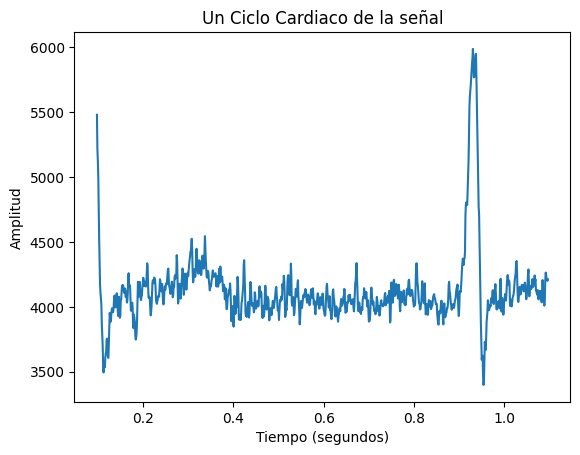

In [11]:
#señal sin filtrar
plt.plot(time_cycle, cycle)
plt.title('Un Ciclo Cardiaco de la señal')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.show()

Nos damos cuenta que un Ciclo dura menos de un segundo es decir que en las secciones seleccionadas podremos encontrar 2 picos
ya que se esta teniendo en cuenta un poco mas de un ciclo.

In [12]:
# Calcular promedio, RMS, varianza y desviación estándar del ciclo
promedio_cycle = np.mean(cycle)
rms_cycle = RMS(cycle)
variance_cycle = np.var(cycle)
std_dev_cycle = np.std(cycle)
print ("Datos de la señal sin filtrar")
print("promedio:", promedio_cycle)
print("RMS:", rms_cycle)
print("varianza:", variance_cycle)
print("std:", rms_cycle)



Datos de la señal sin filtrar
promedio: 4124.2755215168
RMS: 4134.585704107857
varianza: 85150.36723039547
std: 4134.585704107857


In [13]:
# Seleccionar un ciclo cardiaco y graficar
# identificando visualmente dónde comienza un ciclo
start_f = 100
end_index_f = start_index + int(f)  # Un segundo de datos aproximadamente
cycle_f = ecg_signal_filtered[start_f:end_index_f]
time_cycle_f= time[start_f:end_index_f]

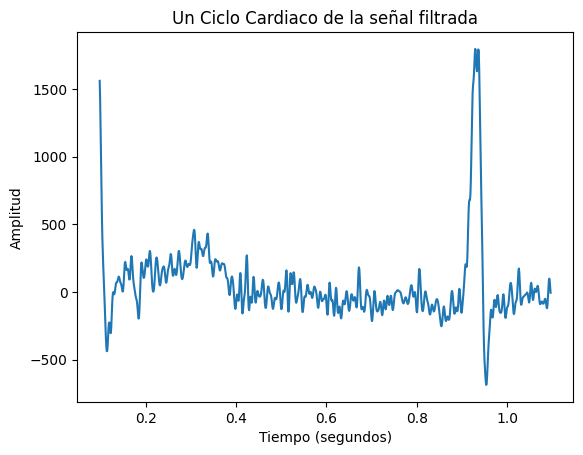

In [14]:
#señal ECG  filtrada
plt.plot(time_cycle_f, cycle_f)
plt.title('Un Ciclo Cardiaco de la señal filtrada')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.show()

In [15]:
# Calcular promedio, RMS, varianza y desviación estándar del ciclo
promedio_cycle_f = np.mean(cycle_f)
rms_cycle_f = RMS(cycle_f)
variance_cycle_f = np.var(cycle_f)
std_dev_cycle_f = np.std(cycle_f)
print ("Datos de la señal filtrada")
print("promedio:", promedio_cycle_f)
print("RMS:", rms_cycle_f)
print("varianza:", variance_cycle_f)
print("std:", rms_cycle_f)


Datos de la señal filtrada
promedio: 49.85302909792428
RMS: 295.56733388310374
varianza: 84874.72434852766
std: 295.56733388310374


Luegos de graficar y analizar un ciclo tomado en los mismos instantes de ambas señales vemos como en la grafica es notable la aplicación de un filtro y se logra apreciar una señal mas limpia en el segundo grafico, por otro lado vemos como las estaditicas (RMS,VARIANZA,STD) dan mucho menor en la señal filtrada precisamente por esa atenuacion en la amplitud, no se genera tanta dispersion entre los picos mas altos y los demas valores de la señal.

In [16]:
num_cycles = 15
cycle_length = int(f)  # Asumiendo que un ciclo tiene aproximadamente 1 segundo

cycles_extracted = [ecg_signal_filtered[i:i + cycle_length] for i in range(0, num_cycles * cycle_length, cycle_length)]


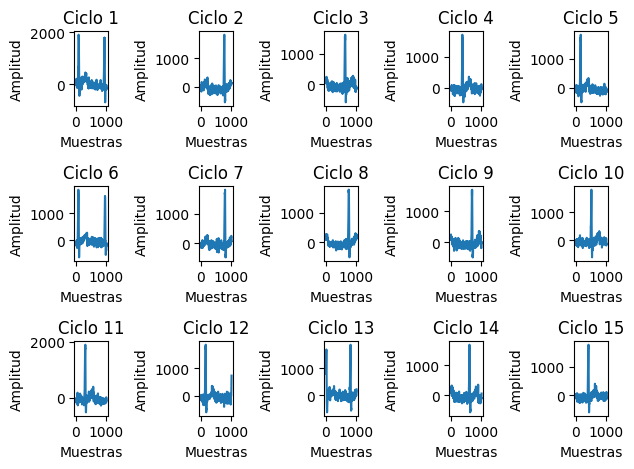

In [17]:
# Graficar cada ciclo

for i, cycle in enumerate(cycles_extracted):
    plt.subplot(3, 5, i+1)
    plt.plot(cycle)
    plt.title(f'Ciclo {i + 1}')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

In [18]:
# Calcular promedio y varianza para cada ciclo
average_cycles = [np.mean(cycle) for cycle in cycles_extracted]
variance_cycles = [np.var(cycle) for cycle in cycles_extracted]
print(f'\n Estadistica de los ciclos:')
print(f'Medias: {average_cycles}')
print(f'Varianzas: {variance_cycles}')





 Estadistica de los ciclos:
Medias: [94.0002672623179, -4.194257855036016, -18.67932864358032, -0.4600723390543049, -19.15246826289512, 23.15180801596328, 12.317758425446465, 0.11379367562548737, 3.398261723995997, -16.738169855936405, -9.999302134003297, -18.763875067660347, 44.908972884036174, -9.390387861057695, -12.099250564677083]
Varianzas: [139227.03355277097, 72474.84592596561, 65100.99761898871, 64316.64387400673, 73575.97852025052, 124467.59758691741, 69928.52206569542, 71777.43184958119, 63669.70082319261, 68546.4525100847, 76404.88514864862, 80627.63084096393, 120137.9023470846, 70516.63039435283, 68448.18173698694]


Graficamos 15 ciclos seguidos de un segundo cada uno, y confirmamos que realmente la frecuencia es menor al ciclo que tomamos por la cual se puede presentar en un ciclo graficado hasta 2 picos altos, popsteriormente calculamos las medias y varianzas para cada ciclo de un segundo.
Cabe aclarar que en este caso para nosotros un ciclo dura un segundo y no coincide exactamente con la frecuencia o los ciclos propios de la señal.

In [29]:
# Punto 4: Comparar dos ciclos utilizando t-test
cycle1 = cycles_extracted[0]
cycle2 = cycles_extracted[1]

# Comprobar supuestos
_, p_norm1 = stats.normaltest(cycle1)
_, p_norm2 = stats.normaltest(cycle2)
print(f'\nPrueba de normalidad:')
print(f'p-valor ciclo 1: {p_norm1:.4f}')
print(f'p-valor ciclo 2: {p_norm2:.4f}')

_, p_homoc = stats.levene(cycle1, cycle2)
print(f'\nPrueba de homocedasticidad (Levene):')
print(f'p-valor: {p_homoc:.4f}')

# Realizar prueba t
if p_norm1 > 0.05 and p_norm2 > 0.05 and p_homoc > 0.05:
    t_stat, p_val = ttest_ind(cycle1, cycle2, equal_var=True)
else:
    t_stat, p_val = ttest_ind(cycle1, cycle2, equal_var=False)

print(f'\nPrueba t:')
print(f'Estadístico t: {t_stat:.4f}')
print(f'p-valor: {p_val:.4f}')


# Si p-valor < 0.05, hay diferencia significativa entre los ciclos
if p_val < 0.05:
    print('Hay diferencia significativa entre los ciclos.')
else:
    print('No hay diferencia significativa entre los ciclos.')


Prueba de normalidad:
p-valor ciclo 1: 0.0000
p-valor ciclo 2: 0.0000

Prueba de homocedasticidad (Levene):
p-valor: 0.0000

Prueba t:
Estadístico t: 6.8259
p-valor: 0.0000
Hay diferencia significativa entre los ciclos.


Hacemos la t estudent junto a la pruebas de normalidad  y homoceasticidad con los siguiente suspuestos respectivamente:

* Ho : Las señales distribuyen de manera normal.
* Ha : Las señales no distribuyen de manera normal.

* Ho : Las medianas son iguales ( los datos no muestran mucha dispersión).
* Ha : Las medianas son diferentes (Hay mucha dispersión en los datos).

Nos damos cuenta que el p valor es mucho menor al alfa, comprobamos y es muy bajito pero no 0 lo que nos indica que debemos hacer otra prueba diferente a la t student para el analisis de los datos.

In [25]:
#: Comparar dos ciclos utilizando U de mann-W
cycle1 = cycles_extracted[0]
cycle2 = cycles_extracted[1]

# Realizar la prueba de U de Mann-Whitney
estadistico_u, p_valor = mannwhitneyu(cycle1, cycle2)

# Imprimir los resultados
print(f"Estadístico U de Mann-Whitney: {estadistico_u:.4f}")
print(f"P-valor: {p_valor:.4f}")

# Interpretación del p-valor
alpha = 0.05  # Nivel de significancia
if p_valor < alpha:
    print("Hay una diferencia significativa entre los ciclos.")
else:
    print("No hay una diferencia significativa entre los ciclos.")

Estadístico U de Mann-Whitney: 644835.0000
P-valor: 0.0000
Hay una diferencia significativa entre los ciclos.


Usamos la pruena U de Mann-Whitney para el analisis de una distribución no normal rechazando nuevamente la hipotesis nula (No hay diferencia significativa entre los datos) y aprobando la hipotesis alternativa(Hay una diferencia significativa entre los datos) ya que el valor p vuelve a se mucho menor que el alpha definido (0.05) resultado que tiene mucho sentido ya que nuevamente por ciclo graficado se pueden presentar hasta 2 picos maximos disparando asi la media y la varianza dentro de un mismo ciclo graficado y aun mas contra los demas ciclos graficados ya que hay ciclos que solo tienen un pico maximo.

In [27]:
p_valor

2.0803414136038588e-19

Mostramos el resultado del valorP

In [20]:
# Prueba de Dickey-Fuller para estacionariedad
result = adfuller(np.squeeze(ecg_signal_filtered))
print(f'\nPrueba de Dickey-Fuller:')
print(f'Estadístico: {result[0]:.4f}')
print(f'p-valor: {result[1]:.4f}')

# Si p-valor < 0.05, se rechaza la hipótesis nula de no estacionariedad
if result[1] < 0.05:
    print('La señal se puede considerar estacionaria.')
else:
    print('La señal no se puede considerar estacionaria.')



Prueba de Dickey-Fuller:
Estadístico: -29.9415
p-valor: 0.0000
La señal se puede considerar estacionaria.


In [21]:
result2 = adfuller(ecg_signal_filtered)
print(f'\nPrueba de Dickey-Fuller:')
print(f'Estadístico: {result2[0]:.4f}')
print(f'p-valor: {result2[1]:.4f}')

# Si p-valor < 0.05, se rechaza la hipótesis nula de no estacionariedad
if result[1] < 0.05:
    print('La señal se puede considerar estacionaria.')
else:
    print('La señal no se puede considerar estacionaria.')


Prueba de Dickey-Fuller:
Estadístico: -29.9415
p-valor: 0.0000
La señal se puede considerar estacionaria.


Aplicamos la prueba de Dickey-Fuller, llamandola de 2 maneras diferentes( una propuesta y una encontrada en la documentación) y obteniendo el mismo resultado en ambas donde nuevamente se rechaza la hipotesis nula sobre la estacionariedad de la señal, resultado esperado ya que aunque la señal tenga una periodicidad mas adelante no alcanzamos a anlaizarla por completo y por otro lado estamos tomando mas de un ciclo de la señal cada vez que graficamos un ciclo de 1 segundo.